## Python 可视化 —— Basic

In [4]:
# !pip install matplotlib

## 一 如何选图

不管是 R、Python 中的绘图包都会提供很多函数以绘制不同的图形。如：直方图、柱状图、散点图、小提琴图、热力图等等。调用对应函数即可。通常相较于画图，选择合适图显得更为重要。而这一点网上很少有教程讨论。我有个原则：

**根据变量数与变量类型选择**

我这里整理了一个简单的思维导图。

![](https://imgkr.cn-bj.ufileos.com/d1e51ef8-eb3d-4125-aefa-ab0fce026c79.png) 

### 3. 三变量
此时你可以选择 3D 图，并且matplotlib 也有相应函数。个人观点，3D图如果不是交互图的话，充其量算是2.5D，剩下的就考验脑补了。

而如果你打算采用2D的方式的，那么有以下两种方式处理：
   - 变量映射: 将第三个变量映射到 颜色or大小 。如气泡图就是这种方式。
   - 共享坐标轴，此时可以选择不同的显示方式，如是否堆积
   - 分图 `subplots()`

### 4. 三个变量以上
正如前面所说，绘图是为了直观简洁的传达信息。

因此，在一幅图中一次包含太多变量信息，可能会分散读者注意力，需权衡。

## 二 如何画图

In [6]:
import numpy as np
import pandas as pd

# 导入绘图包
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [9]:
data = pd.read_csv("../input/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.1. 单变量
  单变量分为连续和离散。
  - 连续型变量
       - 分布图/直方图
       - 箱型图
       - `小提琴图`
   
   其实小提琴图，相当于是分布图与箱型图的结合，包含的信息更多。但是小提琴的图的另一半有点多余。
   所以我一般选择是 **分布图/直方图** > 小提琴图 > 箱型图。
   
   
  - 离散型变量
      - 柱状图
      
  直接做法是统计相应频数，然后转化为双变量中的连续（次数）& 离散的组合处理。

#### 2.1.1 直方图

如上面所说,这主要针对连续变量,而且在第二章的时候我们也提过

##### 2.1.1.1查看 Age 的分布情况

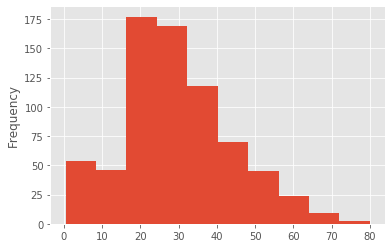

In [15]:
data['Age'].plot(kind='hist')
# 默认划分10等份, 试试将 bins = 20 有什么变化 

#### 2.1.2 柱状图

##### 2.1.2.1查看 Embarked 的分布情况

离散变量的分布查看通常先进行频数统计,然后再用柱状图可视化

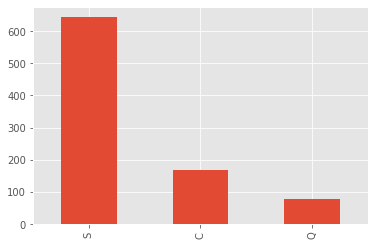

In [18]:
# 统计频数
result = data['Embarked'].value_counts()
result.plot(kind='bar')

单变量的其他绘图类型,感兴趣的小伙伴可以自行探索.

借助帮助文档和搜索引擎,可以轻松解决. 因为不常用,所以暂不做介绍.

In [19]:
pd.DataFrame.plot??

![](https://imgkr.cn-bj.ufileos.com/899277ef-0236-4db1-ba5d-30cd6fa0ec2f.png)

### 2.2. 双变量
  根据变量类型，双变量时有两个连续变量，一个连续一个离散以及两个离散变量三种组合。每种组合的画图方案会有所不同。
  
  #### 2.2.1 两个连续型
  - 散点图
  - 折线图 
  - 面积图 相较于折线图，显得更饱满。
  
  特别当有一个是时间序列时，折线图、面积图效果更好

#### 2.2.1.1 查看年龄与票价之间的关系

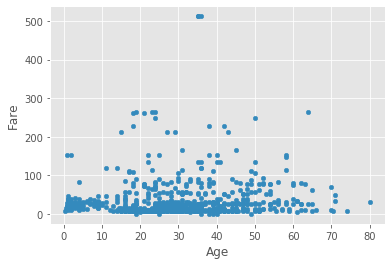

In [27]:
data.plot(x='Age',y='Fare',kind='scatter')

    
#### 2.2.2 连续 & 离散
  此时，根据可视化的目的不同，而有所差异：
  - 比较类别**大小差异** 
  
  当数据中每个类别仅出现一次, 通常是在**数据聚合**之后.
  
  选择 柱状图（条形图）> 散点图； 或者 **饼图/雷达图**。
  
  之所以把饼图和雷达图单独列示一条，因为他们可以看成是柱状图和折线图极坐标下的展示。
  
  
  - 比较类别间 **分布差异**
  
   此时可以选择 多类别小提琴图，或者分布图。
   
![](https://imgkr.cn-bj.ufileos.com/182c10d2-817b-4bcc-b948-d061ebce0708.png)

#### 2.2.2.1 查看存活与否的两类人的平均年龄

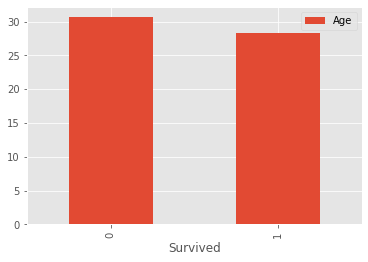

In [26]:
result = data.groupby(['Survived']).agg(np.mean)[['Age']]
result.plot(kind='bar')

#### 2.2.2.2 查看存活与否的两类人的年龄分布情况

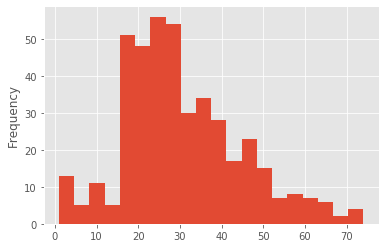

In [33]:
data.loc[data['Survived']==0,'Age'].plot(kind='hist',bins=20,label='0')
data.loc[data['Survived']==1,'Age'].plot(kind='hist',bins=20,label='1')

[Text(0,0.5,'custs'), Text(0.5,0,'rating'), Text(0.5,1,'Pandas')]

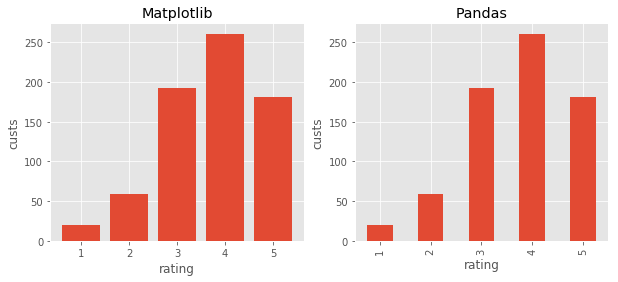

In [4]:
# 设置绘图布
fig,ax = plt.subplots(1,2,figsize=(10,4))
# matplotlib 画法
# plt.bar(df.index,df)
ax[0].bar(df.index,df)
ax[0].set(title='Matplotlib', xlabel='rating', ylabel='custs')


# pandas 画法
df.plot(kind = 'bar',ax=ax[1])
ax[1].set(title='Pandas', xlabel='rating', ylabel='custs')

### 条形图

条形图，基本就是柱状图的转置。在画图的时候只是将原来柱状图的`bar`改成 `barh`.

[Text(0,0.5,'custs'), Text(0.5,0,'rating'), Text(0.5,1,'Pandas')]

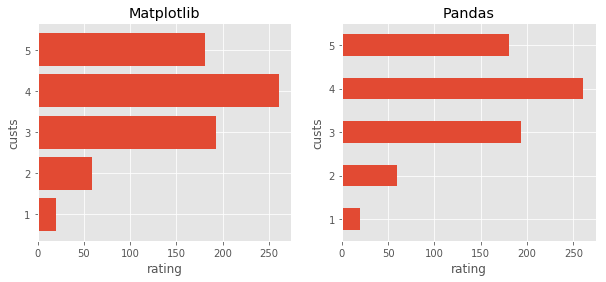

In [5]:
# 设置绘图布
fig,ax = plt.subplots(1,2,figsize=(10,4))
# matplotlib 画法
# plt.bar(df.index,df)
ax[0].barh(df.index,df)
ax[0].set(title='Matplotlib', xlabel='rating', ylabel='custs')


# pandas 画法
df.plot(kind = 'barh',ax=ax[1])
ax[1].set(title='Pandas', xlabel='rating', ylabel='custs')


### 折线图

In [6]:
df1 = pd.DataFrame(np.random.randn(1000, 4), index=list(pd.date_range('1/1/2000', periods=1000)), columns=list('ABCD'))
df1 = df1.cumsum() # 累加函数
df2 = df1.reset_index() 

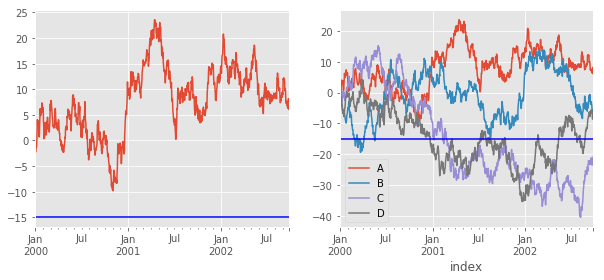

In [7]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
# Series 画图 默认 line 
df1['A'].plot(ax = ax[0])
ax[0].axhline(-15,color ='b')

# DataFrame 画图
df2.plot(x = 'index', y = ['A','B','C','D'],kind='line',ax=ax[1])
ax[1].axhline(-15,color ='b')
# 竖线用 .axvline() 


###  直方图  密度图

直方图 也叫密度图  查看单变量的数值分布情况  （连续型变量） .

一行命令:搞定 `matplotlib` plt.hist(x=df,alpha =0.7,bins = 30) 或者 `pandas` 中 df.plot(kind='hist',alpha =0.7,bins = 30)  # 默认bins 10区间

In [10]:
df = data.Age

[Text(0.5,0,'Age'), Text(0.5,1,'Pandas')]

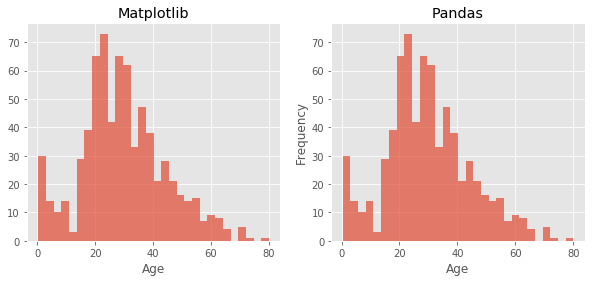

In [12]:
fig,ax = plt.subplots(1,2,figsize=(10,4))

# Matplotlib   Series 画图 
ax[0].hist(x=df,alpha =0.7,bins = 30)
ax[0].set(title='Matplotlib', xlabel='Age')


# DataFrame 画图
df.plot(kind='hist',alpha =0.7,bins = 30)
ax[1].set(title='Pandas', xlabel='Age')

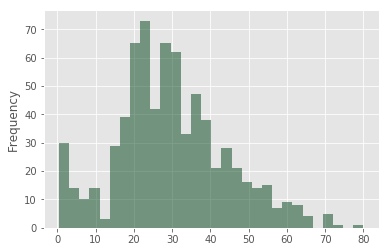

In [34]:
df.plot(kind='hist',alpha =0.5,bins = 30,colormap = 'Greens_r')

[Text(0.5,0,'Age'), Text(0.5,1,'Pandas')]

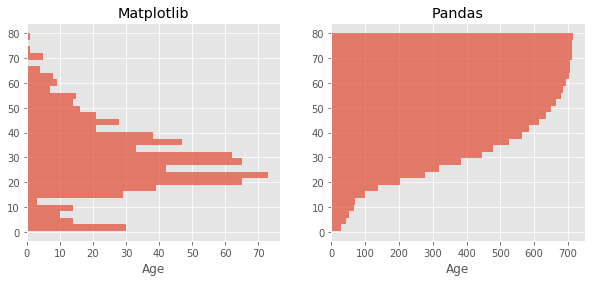

In [101]:
fig,ax = plt.subplots(1,2,figsize=(10,4))

# Matplotlib   Series 画图 
ax[0].hist(x=df,alpha =0.7,bins = 30 ,orientation = 'horizontal')
ax[0].set(title='Matplotlib', xlabel='Age')


# DataFrame 画图
df.plot(kind='hist',alpha =0.7,bins = 30,orientation = 'horizontal',cumulative = True)
ax[1].set(title='Pandas', xlabel='Age')

# orientation 横向的
# cumulative 累加的

In [105]:
df_male = data[data['Sex']==0]['Age']
df_female = data[data['Sex']==1]['Age']

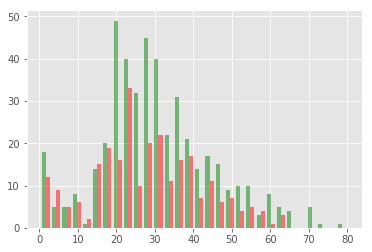

In [123]:
# 并列显示,并不直观.
te = plt.hist(x=[df_male,df_female],alpha =0.5,bins = 30,stacked = False,label =['Male','Female'],color = ['g','r'])

(array([10.,  7.,  6.,  7.,  2.,  2.,  9., 12., 20.,  9., 17., 21., 11.,
        14., 19., 10., 19.,  6., 12.,  7.,  5.,  6.,  6.,  7.,  3.,  4.,
         2.,  4.,  1.,  3.]),
 array([ 0.75 ,  2.825,  4.9  ,  6.975,  9.05 , 11.125, 13.2  , 15.275,
        17.35 , 19.425, 21.5  , 23.575, 25.65 , 27.725, 29.8  , 31.875,
        33.95 , 36.025, 38.1  , 40.175, 42.25 , 44.325, 46.4  , 48.475,
        50.55 , 52.625, 54.7  , 56.775, 58.85 , 60.925, 63.   ]),
 <a list of 30 Patch objects>)

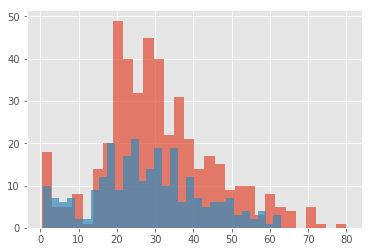

In [126]:
fig,ax = plt.subplots(1,1,figsize=(6,4))

# Matplotlib   Series 画图 
ax.hist(x=df_male,alpha =0.7,bins = 30 )
ax.hist(x=df_female,alpha =0.7,bins = 30 )


### 箱形图

平时用的比较少,因为matplotlib 的箱型图 里面丢失了数据分布的信息,所以更喜欢用seaborn里面的xxx 图结合散点图.

In [12]:
df6 = pd.DataFrame(np.random.rand(10,5),columns =list('ABCDE'))

df6.head()

,A,B,C,D,E
0,0.082283,0.915389,0.318959,0.841591,0.021550
1,0.583631,0.579098,0.049219,0.411705,0.638066
2,0.646796,0.898711,0.868242,0.740525,0.734482
3,0.620464,0.492714,0.126925,0.579611,0.684969
4,0.987050,0.551857,0.312682,0.789676,0.798298


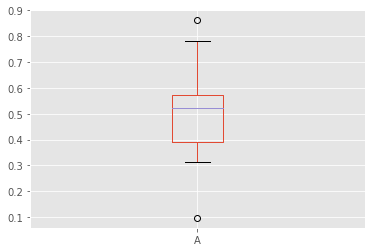

In [37]:
df6['A'].plot(kind='box')

**下面效果一致**

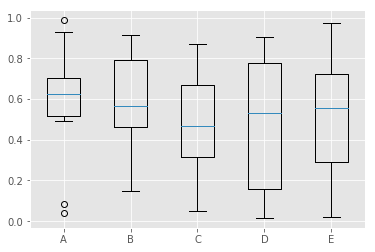

In [13]:
x = plt.boxplot([df6['A'],df6['B'],df6['C'],df6['D'],df6['E']],labels=['A','B','C','D','E'])

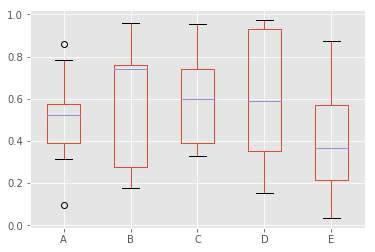

In [36]:
df6.plot(kind='box')
# df6.plot.box()
# df6.boxplot()  # 用boxplot()  也是可以的

对分箱的不同位置设置不同的颜色

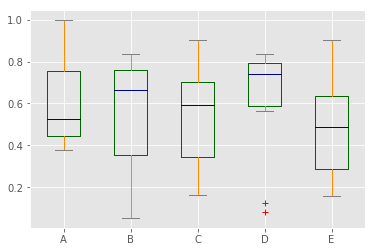

In [127]:
color = dict(boxes ='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
df6.plot.box(color = color , sym = 'r+')  # 异常值用红色 + 好表示

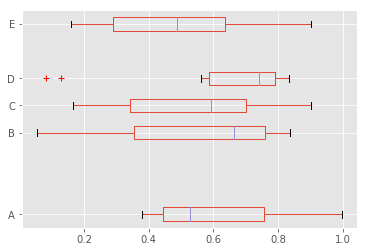

In [132]:
# 横向展示 vert=False  
# 自定义 箱线图位置 positions 
df6.plot.box(vert=False,positions=[1,4,5,6,8],sym = 'r+')

### 散点图  

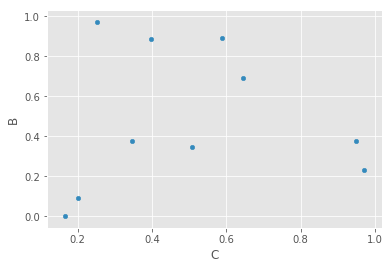

In [147]:
# pandas
df6.plot(kind = 'scatter', x= 'C',y ='B')
# df6.plot.scatter(x= 'C',y ='B')  相同
# c 设置颜色
# df6.plot.scatter(x= 'C',y ='B',c ='blue')  


### 气泡图  

当我们把散点图,的点半径用一个变量的值映射大小之后,便形成了气泡图.看起来更直观,但是它也具有误导性,它会放大数据之间的差距(平方级).因为对观看者来说,他们直观的通过面积反映差异.但在画图的时候我们是通过半径.
所以我更习惯seaborn 中的一个图.

透明度 alpha

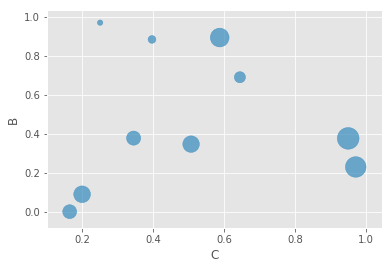

In [157]:
# df6.plot.scatter(x='B',y = 'C',s =df6['A']*200)
df6.plot(kind = 'scatter', x= 'C',y ='B',s =df6['A']*500, alpha =0.7)

用第四个变量,映射到颜色上.(但并不建议这么做,因为过多的信息, 会降低图的直观性,丢失初衷)

c 设置渐变颜色  参数根据连续变量的数值反映颜色

#### 颜色映射---连续型

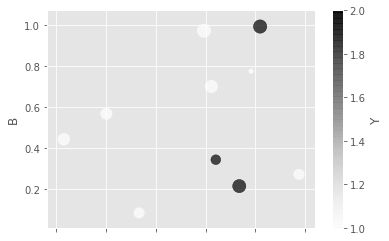

In [219]:
df6.plot(kind = 'scatter', x= 'C',y ='B',c ='Y' ,s =df6['A']*200, alpha =0.7)

In [159]:
df6['X'] = pd.Series(np.random.choice(['A','B'],10))
df6['Y'] = pd.Series(np.random.choice([1,2],10))

#### 颜色映射---离散型

<class 'type'>
<class 'type'>


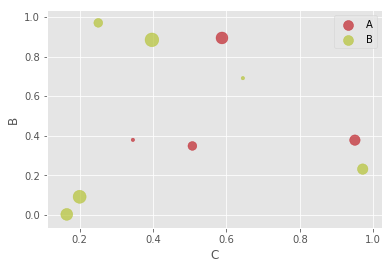

In [160]:
f,ax=plt.subplots(1,1,figsize=(6,4))
# 因子数量列表
X = list(df6['X'].unique())
for i in range(len(X)):
    print(type)
    data = df6.loc[df6['X'] == X[i],:]
    data.plot(kind = 'scatter', x= 'C',y ='B',s =df6['A']*200,color = colorList[i], alpha =0.7,label=X[i], ax = ax)

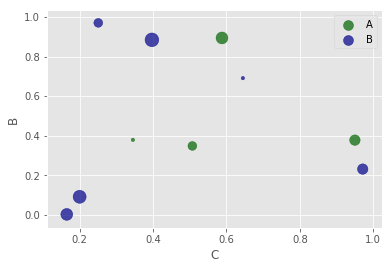

In [161]:
# ax = plt.figure()
# Pandas 画图 散点图 没办法将颜色映射到 因子变量上
data = df6.loc[df6['X'] =='A',:]
data1 = df6.loc[df6['X'] =='B',:]
ax = data.plot(kind = 'scatter', x= 'C',y ='B',color ='DarkGreen',s =df6['A']*200, label ='A',alpha =0.7)
data1.plot(kind = 'scatter', x= 'C',y ='B',color ='DarkBlue',s =df6['A']*200, label ='B',alpha =0.7,ax=ax)

### 面积图

In [21]:
df7 = df6[['A','B','C','D','E']]

In [24]:
df2.head()

,index,A,B,C,D
0,2000-01-01,-0.995187,0.383732,-0.199652,1.020655
1,2000-01-02,0.428800,1.265079,-1.396999,1.523179
2,2000-01-03,0.312691,-0.705991,0.083125,2.200633
3,2000-01-04,0.455829,-0.368274,1.707987,3.148398
4,2000-01-05,-0.272817,0.673259,2.473671,3.503052


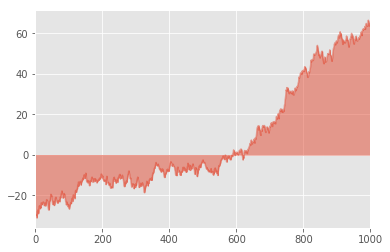

In [33]:
(df2['A']-30).plot(kind ='area',stacked=False) 

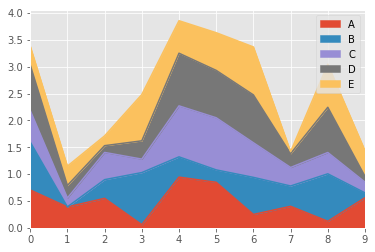

In [170]:
df7.plot(kind ='area') #堆积面积图  默认堆积
# df7.plot.area()

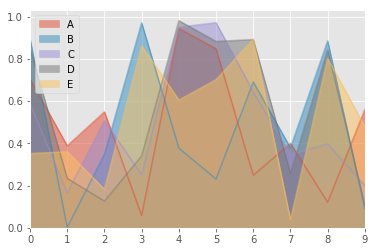

In [171]:
df7.plot(kind ='area', stacked = False)

### 饼图

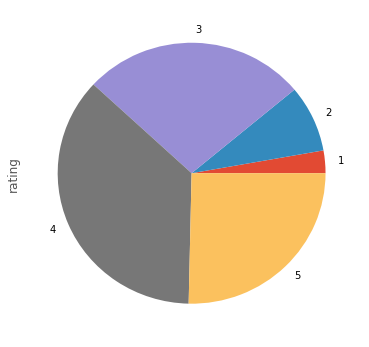

In [52]:
df = data.rating.value_counts().sort_index()
plt.figure(figsize=(6,6))
df.plot(kind='pie')

## 图表美化

### 配色

可视化的成功与否,我觉得配色至少占3成 . 这是我整理PowerBI的默认配色卡() 同给大家.
丢弃 red blue 吧. 试试它们,让你的图瞬间拔. 

In [45]:
colorList = ['#C1232B','#B5C334','#FCCE10','#E87C25','#27727B',
             '#FE8463','#9BCA63','#FAD860','#F3A43B','#60C0DD',
             '#D7504B','#C6E579','#F4E001','#F0805A','#26C0C0']

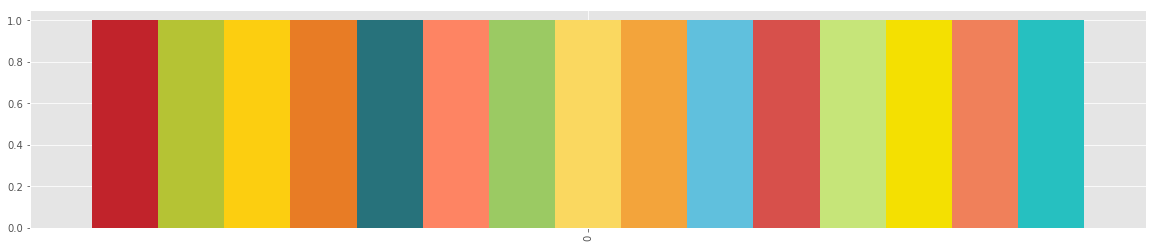

In [46]:
data = pd.DataFrame(np.random.randint(1,2,15).reshape(1,15),columns= colorList)
data.plot(kind='bar',width =4,color =colorList,figsize=(20,4),legend=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001620153FAC8>],
      dtype=object)

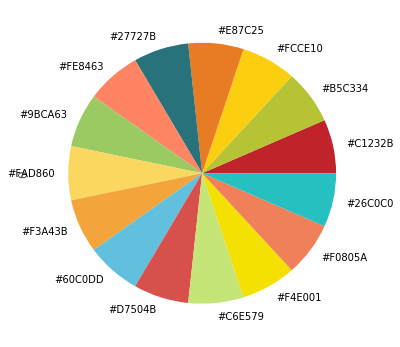

In [47]:
data = pd.DataFrame(np.random.randint(1,2,15).reshape(1,15),columns= colorList).T

data.plot.pie(figsize=(6,6),colors =colorList,subplots=True,legend=False)  # 用的是colors 而非color

### 主题

In [38]:
matplotlib.style.use('ggplot')

In [40]:
# 可用主题
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

### 其他美化操作


这里简单列几条常用的美化方向：
1. **调整间距** `fig.subplots_adjust()`
2. **添加标题** `fig.suptitle()` `ax.set_title()`
3. **增加标记线和记标文本** `ax.axvline()` `ax.text()`
4. **添加图例** `ax.legend()`
5. **调整字体**  `fontdict` `FontProperties()`
6. **调整坐标轴刻度范围，比例尺 以及格式化显示** `ax.set_xlim()` `ax.set_xticks()` `ax.xaxis.set_major_formatter()`
7. ...

In [43]:
# 查看 matplotlib 设置  plt.rcParams
plt.rcParams['font.sans-serif']

['DejaVu Sans',
 'Bitstream Vera Sans',
 'Computer Modern Sans Serif',
 'Lucida Grande',
 'Verdana',
 'Geneva',
 'Lucid',
 'Arial',
 'Helvetica',
 'Avant Garde',
 'sans-serif']

#### 美化前

未美化，自己看也够了

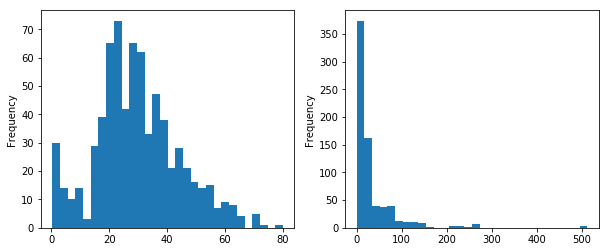

In [9]:
fig,ax = plt.subplots(1,2,figsize=(10,4))

data['Age'].plot(kind='hist',bins = 30, ax=ax[0])  

data['Fare'].plot(kind='hist',bins = 30,ax=ax[1])


#### 美化后

In [3]:
# 查看系统可用的字体
import os
all_fonts = os.listdir('C:\WINDOWS\Fonts')

In [42]:
from matplotlib.ticker import FuncFormatter
# formats 需要带有一个pos 参数,传给 FuncFormatter
def formats(x,pos):
    return '${}'.format(int(x))

In [4]:
from matplotlib.font_manager import FontProperties  

font_title = FontProperties(fname="C:\\WINDOWS\\Fonts\\msyhbd.ttc",  # 字体微软雅黑文件
                            stretch = 'extra-expanded',  # or 0 - 1000
                            weight='bold',  # 字体粗细
                            style = 'oblique',  # 斜体不起作用
                            size=20) 


font_legend = FontProperties('Times New Roman',  
                            stretch = 'extra-expanded',  # or 0 - 1000
                            weight='bold',  # 字体粗细
                            style = 'normal',   #  oblique work
                            size=11) 

In [36]:
font_text = {'family': 'Times New Roman',   # 'serif'
         'style': 'normal', # normal italic oblique
         'weight': 'normal',
         #'color':  '#27727B',  # 字体颜色
         'size': 14,
        }

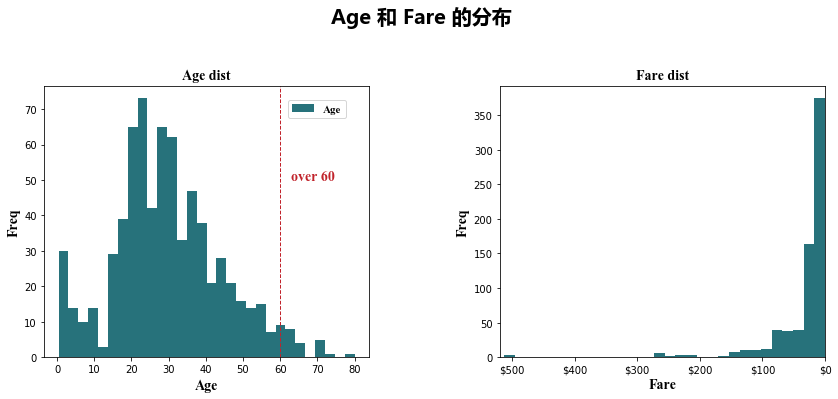

In [37]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
# 设置子图间距
fig.subplots_adjust(wspace =0.4, hspace =0.5)

# 设置大标题 
fig.suptitle(t='Age 和 Fare 的分布',x=0.5,y=1.1, fontdict=font_text,fontproperties=font_title)  # w为了中文 加入

# 绘制子图 1
data['Age'].plot(kind='hist',alpha =1.0,bins = 30,color = '#27727B',label='Age', ax=ax[0])  # label 是在图例legend 时显示的内容
# 绘制子图 2
data['Fare'].plot(kind='hist',alpha =1.0,bins = 30,color = '#27727B',ax =ax[1])


# 设置 x轴 标记线  axvline  axhline
ax[0].axvline(x=60, color='#C1232B', linestyle='--', linewidth=1)

# 设置标记值
ax[0].text(x=63,y=50,s='over 60',color='#C1232B' ,fontdict=font_text)
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html?highlight=legend#matplotlib.pyplot.legend

# 设置图例
# 可以通过指定位置 'upper' 或者 浮点数组表示，这里(x，y) 是占比而不是坐标
ax[0].legend(loc=(0.75,0.88),prop=font_legend)  


# 设置子标题
ax[0].set_title('Age dist',fontdict=font_text)
ax[1].set_title('Fare dist',fontdict=font_text)

# 设置  x 轴名字
ax[0].set_xlabel('Age',fontdict=font_text)
ax[1].set_xlabel('Fare',fontdict=font_text)

# 设置  y 轴名字
ax[0].set_ylabel('Freq',fontdict=font_text)
ax[1].set_ylabel('Freq',fontdict=font_text)

# ax[0].set(title='Age dist', xlabel='Age',ylabel = 'Freq') 快速设置子标题和坐标轴名字 但不可设置字体


# 设置刻度范围 (还有倒序作用)
# ax[1].set_xlim([0,520])
ax[1].set_xlim([520,0])

# 设置刻度切分粒度
ax[1].set_xticks(list(range(0,520,100)))
# -----------------------------
# 格式化坐标轴
formatter = FuncFormatter(formats)  
ax[1].xaxis.set_major_formatter(formatter)


参考官方文档：
https://matplotlib.org/api/axes_api.html

## 图片保存

In [364]:
pl.savefig("plot.png", format ='png', dpi = 80, bbox_inches ='tight',transparent = False )

## Cheat Sheet
![](https://imgkr.cn-bj.ufileos.com/3bc13ae5-00ff-4acd-be16-247dab388be3.png)

## 其他

data : DataFrame
- x : label or position, default None  坐标轴数据
- y : label or position, default None


   - kind : str
    + ‘line’ : line plot (default)
    + ‘bar’ : vertical bar plot
    + ‘barh’ : horizontal bar plot
    + ‘hist’ : histogram
    + ‘box’ : boxplot
    + ‘kde’ : Kernel Density Estimation plot
    + ‘density’ : same as ‘kde’
    + ‘area’ : area plot
    + ‘pie’ : pie plot
    + ‘scatter’ : scatter plot
    + ‘hexbin’ : hexbin plot

- ax : matplotlib axes object, default None

subplots : boolean, default False

Make separate subplots for each column

- sharex : True 共享坐标轴
- sharey : False
- figsize : a 图片大小 (width, height) in inches

use_index : boolean, default True

Use index as ticks for x axis

- title : 标题  subplot 时是 list 对应每个子标题
- grid : boolean, default None (matlab style default)
- legend : 图列 False/True/’reverse’

- logx  / logy / loglog :  default False  对x y 进行log缩放

- xticks / yticks: x/y 的显示刻度 list -- sequence

- xlim/ylim  : 2-tuple/list

rot : int, default None

Rotation for ticks (xticks for vertical, yticks for horizontal plots)

- fontsize :x /y 刻度大小 int, default None

colormap : str or matplotlib colormap object, default None

Colormap to select colors from. If string, load colormap with that name from matplotlib.

colorbar : boolean, optional

If True, plot colorbar (only relevant for ‘scatter’ and ‘hexbin’ plots)

position : float

Specify relative alignments for bar plot layout. From 0 (left/bottom-end) to 1 (right/top-end). Default is 0.5 (center)

table : boolean, Series or DataFrame, default False

If True, draw a table using the data in the DataFrame and the data will be transposed to meet matplotlib’s default layout. If a Series or DataFrame is passed, use passed data to draw a table.

yerr : DataFrame, Series, array-like, dict and str

See Plotting with Error Bars for detail.

xerr : same types as yerr.

stacked : boolean, default False in line and

bar plots, and True in area plot. If True, create stacked plot.

sort_columns : boolean, default False

Sort column names to determine plot ordering

secondary_y : boolean or sequence, default False

Whether to plot on the secondary y-axis If a list/tuple, which columns to plot on secondary y-axis

mark_right : boolean, default True

When using a secondary_y axis, automatically mark the column labels with “(right)” in the legend

kwds : keywords

Options to pass to matplotlib plotting method